## Necessary Imports

In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import find_peaks
from datetime import datetime, timedelta
import plotly.express as px
from scipy import stats

## Read and Prepare the CSV

In [920]:
df = pd.read_csv("../Data/SQL_LHF.csv", index_col='MarketTradeDate')
df.index = pd.to_datetime(df.index)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.replace(-1000000000, np.nan, inplace=True)
df = df.iloc[::-1]
df = df[df.index > '1981-12-31']
df = df[df.index < '2024-01-01']
df.head()

,OpenPx,HighPx,LowPx,SettlementPx,Volume,OpenInterest
MarketTradeDate,,,,,,
1982-01-04,43.97,44.15,43.40,43.82,3043.0,8417.0
1982-01-05,43.67,44.10,43.15,43.87,3087.0,8421.0
1982-01-06,43.88,45.35,43.85,45.27,4447.0,8478.0
1982-01-07,45.27,45.45,44.65,44.85,3613.0,8603.0
1982-01-08,44.85,45.85,44.80,45.60,3406.0,8644.0


In [921]:
yahoo_df = pd.read_csv("../Data/YH_LHF.csv", index_col='Date')
yahoo_df.index = pd.to_datetime(yahoo_df.index)
yahoo_df = yahoo_df.loc[:, ~yahoo_df.columns.str.contains('^Unnamed')]
yahoo_df = yahoo_df.iloc[::-1]
df = df[df.index < '2024-01-01']

yahoo_df = yahoo_df.interpolate()  # Interpolates missing values linearly
yahoo_df = yahoo_df.dropna()       # Drops any remaining NA values

yahoo_df.head()

C:\Users\ldolvin\AppData\Local\Temp\ipykernel_59460\74760968.py:7: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-03-04,59.70,59.88,59.6,59.65,59.65,-
2002-03-05,59.15,59.15,58.7,58.80,58.80,-
2002-03-06,58.50,58.80,57.7,57.70,57.70,-
2002-03-07,58.20,58.60,58.0,58.40,58.40,-
2002-03-08,58.25,58.25,57.9,58.05,58.05,-


## EDA

In [922]:
print(df['OpenPx'].isna().sum(), df['HighPx'].isna().sum(), df['LowPx'].isna().sum(), df['SettlementPx'].isna().sum(), df['Volume'].isna().sum(), df['OpenInterest'].isna().sum())

1 1 1 0 0 4


In [923]:
# Creating an interactive plot
fig = go.Figure(data=[go.Scatter(x=df.index, y=df['SettlementPx'], mode='lines')])

# Update layout for a better visual appearance
fig.update_layout(
    title='Settlement (Close) Price Over Time',
    xaxis_title='Date',
    yaxis_title='Settlement Price',
    hovermode='closest'  # Show closest data point on hover
)

# Show the figure
fig.show()

In [924]:
temp_df = pd.merge(yahoo_df, df, how='left', left_on='Date', right_index=True)
temp_df.head()

,Open,High,Low,Close,Adj Close,Volume_x,OpenPx,HighPx,LowPx,SettlementPx,Volume_y,OpenInterest
Date,,,,,,,,,,,,
2002-03-04,59.70,59.88,59.6,59.65,59.65,-,59.70,59.90,59.550,59.675,2808.0,16577.0
2002-03-05,59.15,59.15,58.7,58.80,58.80,-,59.15,59.30,58.600,58.850,3937.0,16361.0
2002-03-06,58.50,58.80,57.7,57.70,57.70,-,58.70,58.85,57.650,57.975,5997.0,15815.0
2002-03-07,58.20,58.60,58.0,58.40,58.40,-,58.10,58.65,58.000,58.325,4427.0,15185.0
2002-03-08,58.25,58.25,57.9,58.05,58.05,-,58.25,58.30,57.875,58.125,3441.0,14772.0


In [925]:
# Creating an interactive plot
fig = px.line(temp_df, x=temp_df.index, y=['Adj Close', 'SettlementPx'])

# Update layout for a better visual appearance
fig.update_layout(
    title='YH vs SQL Close Price Over Time',
    xaxis_title='Date',
    yaxis_title='Closes',
    hovermode='closest'  # Show closest data point on hover
)

# Show the figure
fig.show()

del temp_df

## Additive Model of Time Series Decomposition

Peak Dates:
1982-06-18
1983-06-16
1984-06-15
1985-06-14
1986-06-13
1987-06-12
1988-06-10
1989-06-09
1990-06-08
1991-06-07
1992-06-05
1993-06-08
1994-06-07
1995-06-06
1996-06-05
1997-06-06
1998-06-08
1999-06-08
2000-06-07
2001-06-07
2002-06-11
2003-06-12
2004-06-14
2005-06-14
2006-06-14
2007-06-15
2008-06-16
2009-06-16
2010-06-16
2011-06-15
2012-06-14
2013-06-14
2014-06-16
2015-06-16
2016-06-15
2017-06-15
2018-06-15
2019-06-17
2020-06-16
2021-06-16
2022-06-15
2023-06-16

Trough Dates:
1982-11-09
1983-11-07
1984-11-06
1985-11-05
1986-11-04
1987-11-03
1988-11-01
1989-10-31
1990-10-30
1991-10-29
1992-10-27
1993-10-28
1994-10-27
1995-10-26
1996-10-25
1997-10-28
1998-10-28
1999-10-28
2000-10-27
2001-10-31
2002-10-31
2003-11-03
2004-11-03
2005-11-03
2006-11-03
2007-11-06
2008-11-05
2009-11-05
2010-11-05
2011-11-04
2012-11-05
2013-11-05
2014-11-05
2015-11-05
2016-11-04
2017-11-06
2018-11-06
2019-11-06
2020-11-05
2021-11-05
2022-11-07
2023-11-08


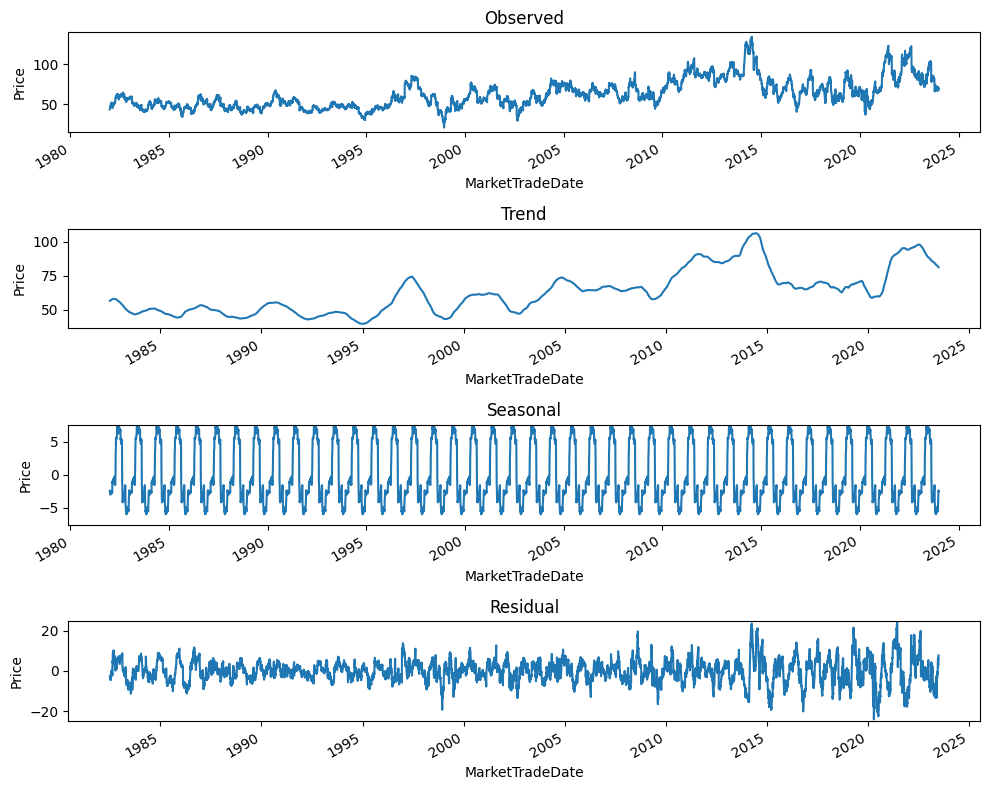

In [926]:
result = seasonal_decompose(df['SettlementPx'], model='additive', period=252)

# Extract the seasonal component
seasonal = result.seasonal

# Initialize lists to store peak and trough dates
peak_dates = []
trough_dates = []

# Loop through each year in the data
for year in range(seasonal.index.year.min(), seasonal.index.year.max() + 1):
    # Extract the seasonal component for the current year
    yearly_seasonal = seasonal[seasonal.index.year == year]
    
    # Find peaks (local maxima) within the current year
    peaks, _ = find_peaks(yearly_seasonal)
    if peaks.size > 0:
        peak_date = yearly_seasonal.index[peaks[np.argmax(yearly_seasonal.iloc[peaks])]]
        peak_dates.append(peak_date)
    
    # Find troughs (local minima) within the current year
    troughs, _ = find_peaks(-yearly_seasonal)
    if troughs.size > 0:
        trough_date = yearly_seasonal.index[troughs[np.argmin(yearly_seasonal.iloc[troughs])]]
        trough_dates.append(trough_date)

# Print the dates
print("Peak Dates:")
for date in peak_dates:
    print(date.strftime('%Y-%m-%d'))

print("\nTrough Dates:")
for date in trough_dates:
    print(date.strftime('%Y-%m-%d'))
# Plotting with adjustments
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

# Dynamic y-axis limits based on actual data ranges
seasonal_limit = max(abs(result.seasonal.min()), abs(result.seasonal.max()))
resid_limit = max(abs(result.resid.min()), abs(result.resid.max()))

# Adjusting the y-axis scale for seasonal and residual if necessary
axes[2].set_ylim(-seasonal_limit, seasonal_limit)  # Adjust to fit the seasonal data
axes[3].set_ylim(-resid_limit, resid_limit)  # Adjust to fit the residual data
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [927]:
# Extract the seasonal component
seasonal = result.seasonal

# Initialize lists to store peak and trough dates
peak_dates = []
trough_dates = []

# Loop through each year in the data
for year in range(seasonal.index.year.min(), seasonal.index.year.max() + 1):
    # Extract the seasonal component for the current year
    yearly_seasonal = seasonal[seasonal.index.year == year]
    
    # Find peaks (local maxima) within the current year
    peaks, _ = find_peaks(yearly_seasonal)
    if peaks.size > 0:
        peak_date = yearly_seasonal.index[peaks[np.argmax(yearly_seasonal.iloc[peaks])]]
        peak_dates.append(peak_date)
    
    # Find troughs (local minima) within the current year
    troughs, _ = find_peaks(-yearly_seasonal)
    if troughs.size > 0:
        trough_date = yearly_seasonal.index[troughs[np.argmin(yearly_seasonal.iloc[troughs])]]
        trough_dates.append(trough_date)

# Convert dates to day of year
peak_days = [date.timetuple().tm_yday for date in peak_dates]
trough_days = [date.timetuple().tm_yday for date in trough_dates]

# Calculate average day of year
avg_peak_day = int(np.mean(peak_days))
avg_trough_day = int(np.mean(trough_days))

# Convert average day of year back to a date (choosing a non-leap year for consistency)
reference_year = 2000  # Non-leap year to avoid complications with Feb 29
avg_peak_date = datetime(reference_year, 1, 1) + timedelta(days=avg_peak_day - 1)
avg_trough_date = datetime(reference_year, 1, 1) + timedelta(days=avg_trough_day - 1)

# Print the average dates
print("Average Peak Date:", avg_peak_date.strftime('%Y-%m-%d'))
print("Average Trough Date:", avg_trough_date.strftime('%Y-%m-%d'))

Average Peak Date: 2000-06-11
Average Trough Date: 2000-11-01


## Backtest the Strategy

In [928]:
def backtest(df, buy, sell):
    df['pct_change'] = df['SettlementPx'].pct_change()
    df = df.iloc[1:, :]
    return_list =[]
    date_list = []

    for i, row in df.iterrows():
        # Extract the month and day from the index
        temp = datetime(year=1904, month=i.month, day=i.day)
        # Check if the date is between the start and end dates
        if sell <= temp < buy:
            return_list.append(-1*row['pct_change'])
            date_list.append(i)
        else:
            return_list.append(row['pct_change'])
            date_list.append(i)
    
    return_df = pd.DataFrame({'date': date_list, 'return': return_list}, columns=['date', 'return'])
    return_df.set_index('date')
 
    return return_df

In [929]:
sell = datetime(year=1904, month=avg_peak_date.month, day=avg_peak_date.day)
buy = datetime(year=1904, month=avg_trough_date.month, day=avg_trough_date.day)
return_df = backtest(df, buy, sell)
return_df.head()

,date,return
0,1982-01-05,0.001141
1,1982-01-06,0.031912
2,1982-01-07,-0.009278
3,1982-01-08,0.016722
4,1982-01-11,-0.005044


In [930]:
total_return = 1
for i, row in return_df.iterrows():
    total_return *= (1 + row['return'])
total_return = (total_return - 1)
print(f"Total Return: {'%.2f' % (total_return*100)}%")

Total Return: 90531600.45%


In [931]:
yearly_avg = ((total_return + 1)**(1/42))-1
print(f"Annual Return: {'%.2f' % (yearly_avg*100)}%")

Annual Return: 38.62%


#### Year By Year Analysis

In [932]:
return_df.set_index('date', inplace=True)
annual_data = return_df.groupby(pd.Grouper(freq='YE'))
annual_returns = annual_data['return'].apply(lambda x: (1 + x).prod() - 1)
annual_std_dev = annual_data['return'].std()
annual_sharpe = (annual_returns - 0.01616) / annual_std_dev
annual_summary = pd.DataFrame({'Annual Returns': annual_returns, 'Annual Std Dev': annual_std_dev, 'Annual Sharpe': annual_sharpe})

total_return = (1 + annual_summary['Annual Returns']).prod()
print(f"Total Return: {'%.2f' % ((total_return-1)*100)}%")
print()

print(f"Average Return: {'%.2f' % ((stats.gmean(annual_summary['Annual Returns'] + 1)-1)*100)}%, Average Std Dev: {'%.4f' % annual_summary['Annual Std Dev'].mean()}, Average Sharpe: {'%.2f' % annual_summary['Annual Sharpe'].mean()}")
print()

annual_summary.head(45)

Total Return: 90531600.45%

Average Return: 38.62%, Average Std Dev: 0.0215, Average Sharpe: 20.90



,Annual Returns,Annual Std Dev,Annual Sharpe
date,,,
1982-12-31,0.643141,0.016179,38.753146
1983-12-31,0.128637,0.017555,6.407092
1984-12-31,0.150580,0.015953,8.425957
1985-12-31,-0.108670,0.017779,-7.021095
1986-12-31,-0.006851,0.019376,-1.187604
1987-12-31,0.634391,0.019922,31.033207
1988-12-31,0.669531,0.018985,34.415341
1989-12-31,0.066260,0.017481,2.865956
1990-12-31,0.479041,0.015924,29.067341
